In [1]:
  from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [6]:
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import cv2 
import matplotlib.pyplot as plt
from functools import reduce

#Read styles.csv
styles = pd.read_csv('styles.csv', error_bad_lines=False, warn_bad_lines=False)
images = np.array(styles[['id']])
styles = styles[['id', 'subCategory']]
replaced_style = styles['subCategory'].replace({'Sandal': 'Shoes', 'Flip Flops': 'Shoes', 'Watches': 'Accessories', 'Jewellery' :'Accessories'})
replaced_df = pd.DataFrame(styles['id']).join(replaced_style)
print(replaced_df.shape)
fashion_df = replaced_df.loc[replaced_df['subCategory'] == 'Topwear'].append(replaced_df.loc[replaced_df['subCategory'] == 'Shoes']).append(replaced_df.loc[replaced_df['subCategory'] == 'Bottomwear']).append(replaced_df.loc[replaced_df['subCategory'] == 'Bags']).append(replaced_df.loc[replaced_df['subCategory'] == 'Accessories'])
print(fashion_df)
index = list(fashion_df.index)
print(len(index))

images_df = images[index]
links = ['/content/gdrive/MyDrive/Kaggle/myntradataset/images/'+ str(images_df[i, 0]) + '.jpg' for i in range(34115)]

(44424, 2)
          id  subCategory
0      15970      Topwear
4      53759      Topwear
5       1855      Topwear
6      30805      Topwear
7      26960      Topwear
...      ...          ...
44390  45223  Accessories
44398  32371  Accessories
44403  45011  Accessories
44413  40563  Accessories
44423  51623  Accessories

[34120 rows x 2 columns]
34120


image can not be opened /content/gdrive/MyDrive/Kaggle/myntradataset/images/39403.jpg
image can not be opened /content/gdrive/MyDrive/Kaggle/myntradataset/images/39410.jpg
image can not be opened /content/gdrive/MyDrive/Kaggle/myntradataset/images/39425.jpg
image can not be opened /content/gdrive/MyDrive/Kaggle/myntradataset/images/12347.jpg
image can not be opened /content/gdrive/MyDrive/Kaggle/myntradataset/images/39401.jpg
34110


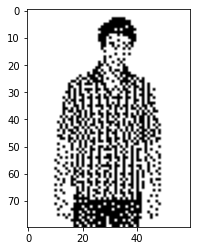

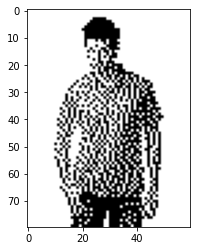

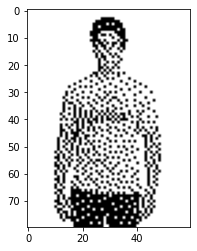

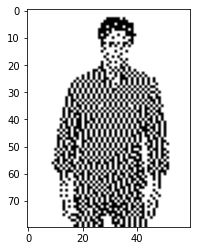

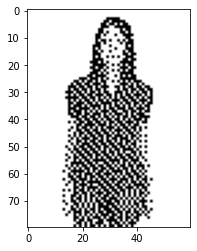

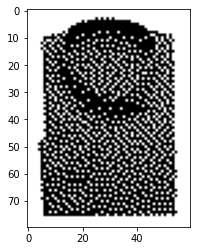

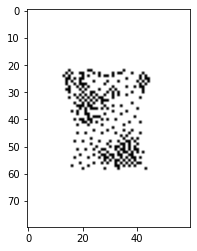

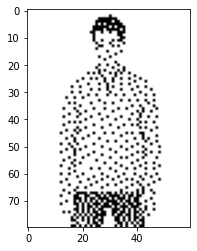

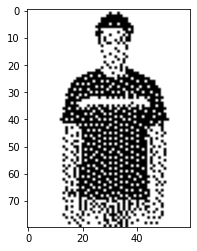

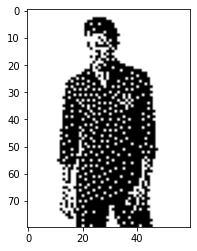

In [7]:
import skimage
from skimage import feature
import sys
filter_images = []
low_threshold = .1
high_threshold = .4
# len(im)
def filter(im):
    for i in range(len(im)):
        image = np.array(im[i])
        #edges = skimage.feature.canny(image, sigma=1)
        #edge_inv = np.array(np.logical_not(edges)*1)
        #filter_images.append(edge_inv)
        filter_images.append(np.float32(im[i])) 
# 34115
im = []
for i in range(34115):
  try:
    image = Image.open(links[i])
    im.append(image.convert('1'))
  except IOError:
    print ('image can not be opened', links[i] )
  


  

filter(im)
print(len(filter_images))

for i in range(10):
    plt.imshow(filter_images[i], cmap='gray')
    plt.show()


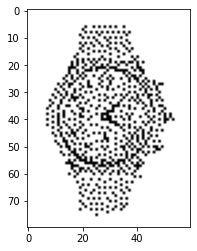

In [8]:
filter_images = np.array(filter_images)
y = fashion_df['subCategory'].replace({'Topwear': 1, 'Bottomwear': 2,  'Shoes': 3, 'Bags': 4,  'Accessories': 5})
plt.imshow(filter_images[32216], cmap='gray')
plt.show()
y = y.reset_index(level=None, drop=True) 
## The index has been reset to match the images


(34099, 80, 60)


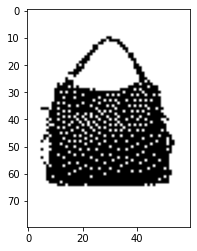

In [9]:
#A  =  pd.DataFrame({'col':filter_images})
#A = np.array([filter_images[1],  filter_images[2], filter_images[3], filter_images[4]])
#print(A.shape)
A = []
df = pd.DataFrame()
df = pd.DataFrame(styles['id']).join(replaced_style)
d = []
for i in range(len(filter_images)):
    if(filter_images[i].shape == (80,60)):
        A.append(filter_images[i])
        d.append(y[i])
for i in range(30):
    plt.imshow(A[i*1000], cmap='gray')
A = np.array(A)
print(A.shape)

In [ ]:
# normal len(d)
K=len(d)
m = [[],[],[],[],[],[],[],[]]  
m[0] = np.array([k for k in range(0,K,5)]).T    
m[1] = np.array([k for k in range(1,K,5)]).T    
m[2] = np.array([k for k in range(2,K,5)]).T
m[3] = np.array([k for k in range(3,K,5)]).T 
m[4] = np.array([k for k in range(4,K,5)]).T  
r = []    
r.append(reduce(np.union1d, (m[1],m[2],m[3],m[4])))  
r.append(reduce(np.union1d, (m[0],m[2],m[3],m[4])))     
r.append(reduce(np.union1d, (m[0],m[1],m[3],m[4])))  
r.append(reduce(np.union1d, (m[0],m[1],m[2],m[4])))  
r.append(reduce(np.union1d, (m[0],m[1],m[2],m[3])))  

In [ ]:
## Linear regression model 
# one hot encodeing
d = np.array(d)
b = []
for i in range(len(d)):
    if(d[i] == 1):
        b.append([0,0,0,0,1])
    if(d[i] == 2):
        b.append([0,0,0,1,0])
    if(d[i] == 3):
        b.append([0,0,1,0,0])
    if(d[i] == 4):
        b.append([0,1,0,0,0])
    if(d[i] == 5):
        b.append([1,0,0,0,0])
y = np.array(b)


In [ ]:
### Convolutional Neural Network ### 
import tensorflow as tf
import keras
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models

model = Sequential()
model = Sequential()
model.add(Dense(16, input_dim = 4800, activation='relu' ))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='softmax'))

#model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80, 60,1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (5, 5), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                76816     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 65        
Total params: 77,085
Trainable params: 77,085
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for i in range(0,5):
            shape_0 = len(A[r[i]])
            shape_1 = len(A[m[i]])
            print(f"\n")
            print("Cross Validation set", i)
            print(f"\n")
            X_train, X_test, y_train, y_test =A[r[i]].reshape(shape_0, 4800), A[m[i]].reshape(shape_1, 4800), y[r[i]], y[m[i]]
            history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),)
          




Cross Validation set 0


Epoch 1/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3899 - accuracy: 0.8405 - val_loss: 0.4095 - val_accuracy: 0.8290
Epoch 2/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3857 - accuracy: 0.8408 - val_loss: 0.4773 - val_accuracy: 0.7981
Epoch 3/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3843 - accuracy: 0.8416 - val_loss: 0.3805 - val_accuracy: 0.8419
Epoch 4/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3835 - accuracy: 0.8424 - val_loss: 0.3768 - val_accuracy: 0.8409
Epoch 5/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3814 - accuracy: 0.8423 - val_loss: 0.3705 - val_accuracy: 0.8449
Epoch 6/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3786 - accuracy: 0.8439 - val_loss: 0.4417 - val_accuracy: 0.8141
Epoch 7/100
427/427 [==============================] - 2s 4ms/step - loss: 0.3789 - accuracy: 0.8431 - val_loss: 0.